# Matematický software - Alternativní úloha 3: Zombie apokalypsa

Ve třetí úloze jsem implementoval základní matematický model zombie apokalypsy pomocí soustavy obyčejných diferenciálních rovnic. Model pracoval se třemi skupinami: zdravými jedinci (S), zombiemi (Z) a mrtvými (R).

Provedl jsem několik simulací, ve kterých jsem zkoumal, jak změna parametrů nebo přidání nové skupiny ovlivní chování systému. Cílem bylo pochopit dynamiku modelu a pozorovat, jak se mění průběh epidemie v závislosti na konkrétních úpravách.

### Výchozí simulace

V první fázi jsem provedl simulaci modelu zombie apokalypsy s výchozími hodnotami parametrů:

- β = 0.0095 (infekčnost),
- α = 0.005 (schopnost zdravých likvidovat zombie),
- ζ = 0.0001 (pravděpodobnost návratu mrtvých do života).

Počáteční populace:

- 500 zdravých lidí,
- 1 zombie,
- 0 mrtvých.

Simulace ukázala, že **zombie nákaza se šíří pomalu, ale nevyhnutelně**. Zdraví lidé postupně vymizeli a zůstala převažující populace zombie a mrtvých.

Model v tomto nastavení směřoval k **rovnovážnému stavu**, ve kterém se počet zombie stabilizoval, stejně jako počet mrtvých. Žádná skupina již nerostla, protože nebyli další živí jedinci k infikování.

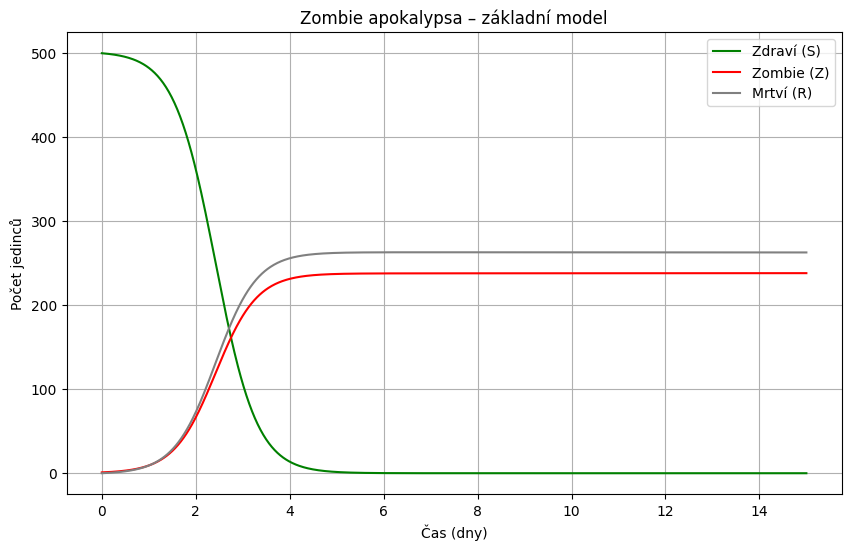

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parametry modelu
beta = 0.0095   # infekčnost
alpha = 0.005   # zabíjení zombíků
zeta = 0.0001   # návrat mrtvých zpět mezi zombie

# Počáteční stavy
S0 = 500        # zdraví
Z0 = 1          # zombie
R0 = 0          # mrtví
initial_state = [S0, Z0, R0]

# Časová osa
t = np.linspace(0, 15, 1000)

# Rovnice systému
def zombie_model(y, t, beta, alpha, zeta):
    S, Z, R = y
    dSdt = -beta * S * Z
    dZdt = beta * S * Z + zeta * R - alpha * S * Z
    dRdt = alpha * S * Z - zeta * R
    return [dSdt, dZdt, dRdt]

# Výpočet
solution = odeint(zombie_model, initial_state, t, args=(beta, alpha, zeta))
S, Z, R = solution.T

# Graf
plt.figure(figsize=(10,6))
plt.plot(t, S, label='Zdraví (S)', color='green')
plt.plot(t, Z, label='Zombie (Z)', color='red')
plt.plot(t, R, label='Mrtví (R)', color='gray')
plt.xlabel('Čas (dny)')
plt.ylabel('Počet jedinců')
plt.title('Zombie apokalypsa – základní model')
plt.legend()
plt.grid(True)
plt.show()


### Výzkumná otázka 1

- Jak ovlivní vyšší hodnota infekčnosti (β) průběh zombie epidemie?

- Při první simulaci jsem se zaměřil na vliv parametru infekčnosti β. V základním nastavení byla jeho hodnota 0.0095. Poté jsem ji zvýšil na 0.02 a porovnal průběh epidemie.

- Zvýšení infekčnosti mělo zásadní dopad: zdraví lidé vymizeli téměř během jednoho dne, zatímco při původní hodnotě trvalo několik dní, než zdravá populace zcela zanikla. Zombie populace velmi rychle převzala kontrolu nad celým systémem.

- Z toho vyplývá, že vyšší hodnota β výrazně zrychluje šíření nákazy a zkracuje dobu přežití zdravých jedinců, čímž celý kolaps společnosti probíhá podstatně rychleji.

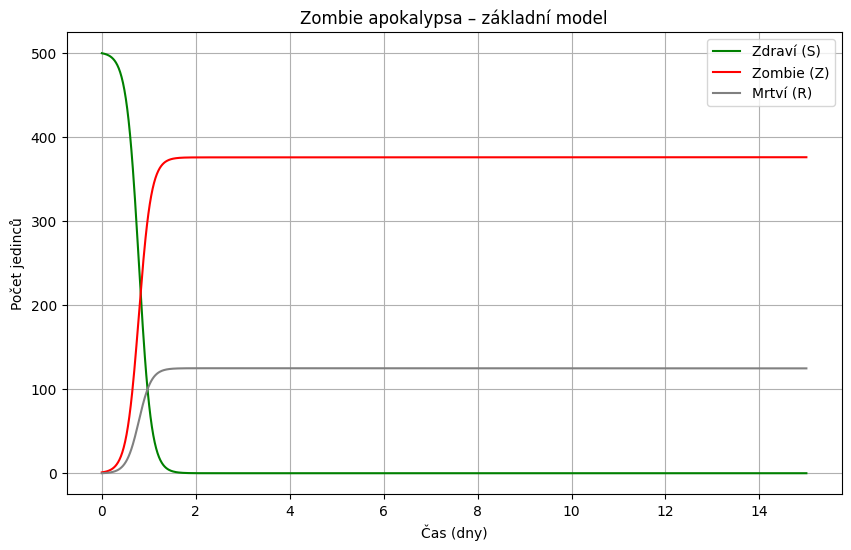

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parametry modelu
beta = 0.02   # infekčnost
alpha = 0.005   # zabíjení zombíků
zeta = 0.0001   # návrat mrtvých zpět mezi zombie

# Počáteční stavy
S0 = 500        # zdraví
Z0 = 1          # zombie
R0 = 0          # mrtví
initial_state = [S0, Z0, R0]

# Časová osa
t = np.linspace(0, 15, 1000)

# Rovnice systému
def zombie_model(y, t, beta, alpha, zeta):
    S, Z, R = y
    dSdt = -beta * S * Z
    dZdt = beta * S * Z + zeta * R - alpha * S * Z
    dRdt = alpha * S * Z - zeta * R
    return [dSdt, dZdt, dRdt]

# Výpočet
solution = odeint(zombie_model, initial_state, t, args=(beta, alpha, zeta))
S, Z, R = solution.T

# Graf
plt.figure(figsize=(10,6))
plt.plot(t, S, label='Zdraví (S)', color='green')
plt.plot(t, Z, label='Zombie (Z)', color='red')
plt.plot(t, R, label='Mrtví (R)', color='gray')
plt.xlabel('Čas (dny)')
plt.ylabel('Počet jedinců')
plt.title('Zombie apokalypsa – základní model')
plt.legend()
plt.grid(True)
plt.show()


### Výzkumná otázka 2

- Co se stane, pokud zvýším hodnotu ζ (pravděpodobnost, že se mrtví vracejí jako zombie)?

- Ve druhé simulaci jsem se zaměřil na parametr ζ, který určuje, jak často se mrtví znovu proměňují v zombie. Původní hodnota byla nastavena na 0.0001. Tuto hodnotu jsem zvýšil na 0.01, abych sledoval, jaký vliv bude mít výraznější návrat mrtvých zpět mezi živé zombie.

- Výsledkem bylo, že počet mrtvých přestal růst a začal klesat, zatímco počet zombie pokračoval v mírném růstu i po vymizení zdravých lidí.

- To ukazuje, že i po úplném zániku populace zdravých může parametr ζ výrazně ovlivnit chování systému – udržuje zombie populaci „naživu“ tím, že recykluje mrtvé zpět do nebezpečné podoby.

- Zvýšením ζ tedy prodlužujeme trvání hrozby, i když už není koho infikovat.

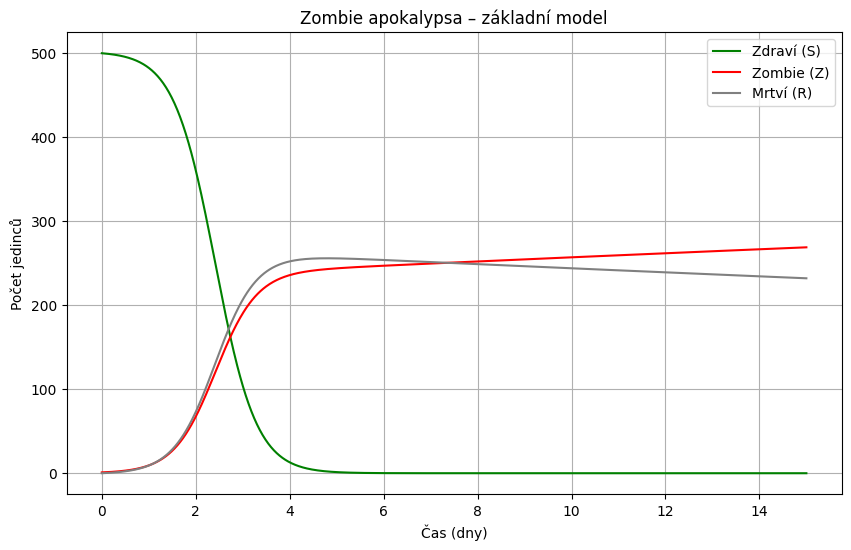

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parametry modelu
beta = 0.0095   # infekčnost
alpha = 0.005   # zabíjení zombíků
zeta = 0.01   # návrat mrtvých zpět mezi zombie

# Počáteční stavy
S0 = 500        # zdraví
Z0 = 1          # zombie
R0 = 0          # mrtví
initial_state = [S0, Z0, R0]

# Časová osa
t = np.linspace(0, 15, 1000)

# Rovnice systému
def zombie_model(y, t, beta, alpha, zeta):
    S, Z, R = y
    dSdt = -beta * S * Z
    dZdt = beta * S * Z + zeta * R - alpha * S * Z
    dRdt = alpha * S * Z - zeta * R
    return [dSdt, dZdt, dRdt]

# Výpočet
solution = odeint(zombie_model, initial_state, t, args=(beta, alpha, zeta))
S, Z, R = solution.T

# Graf
plt.figure(figsize=(10,6))
plt.plot(t, S, label='Zdraví (S)', color='green')
plt.plot(t, Z, label='Zombie (Z)', color='red')
plt.plot(t, R, label='Mrtví (R)', color='gray')
plt.xlabel('Čas (dny)')
plt.ylabel('Počet jedinců')
plt.title('Zombie apokalypsa – základní model')
plt.legend()
plt.grid(True)
plt.show()


### Otázka 3: Co by se stalo, kdyby do systému přibyla skupina imunních lidí, kteří se nemohou nakazit a zároveň pomáhají likvidovat zombie?

Zavedeme novou skupinu:
- I = imunní jedinci
- Nemohou být infikováni zombiemi, ale mohou likvidovat zombie efektivněji.

Zachováme původní skupiny a přidáme I
rovnice bude vypadat takto:

<img src="rovnice pro skupinu imunních lidí.png" alt="Rovnice predátora a kořisti" style="width:50%; max-width:300px;">

kde θ je účinnost imunních jedinců při ničení zombíků.

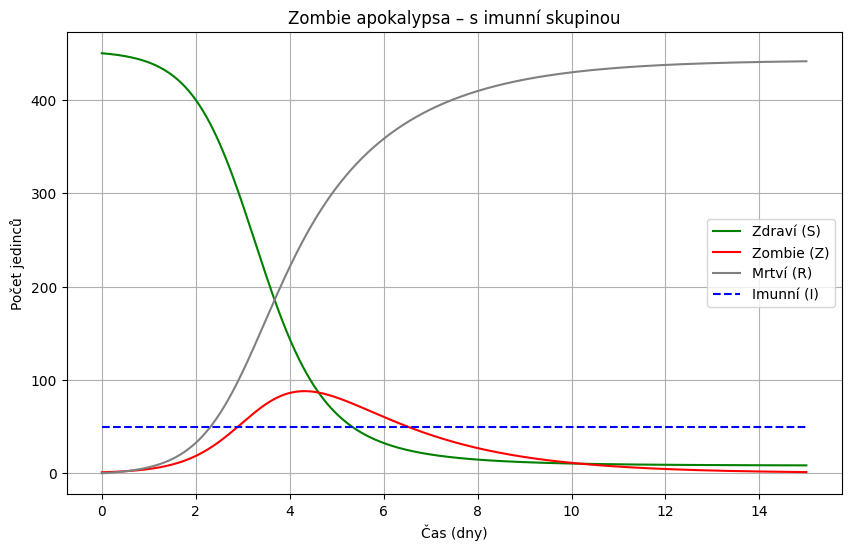

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parametry modelu
beta = 0.0095   # infekčnost
alpha = 0.005   # zabíjení zombíků běžnými lidmi
zeta = 0.0001   # návrat mrtvých do života
theta = 0.01    # zabíjení zombíků imunními lidmi

# Počáteční hodnoty
S0 = 450        # zdraví
Z0 = 1          # zombie
R0 = 0          # mrtví
I0 = 50         # imunní lidé
initial_state = [S0, Z0, R0, I0]

# Časová osa
t = np.linspace(0, 15, 1000)

# Rovnice modelu
def zombie_model_with_immune(y, t, beta, alpha, zeta, theta):
    S, Z, R, I = y
    dSdt = -beta * S * Z
    dZdt = beta * S * Z + zeta * R - alpha * S * Z - theta * I * Z
    dRdt = alpha * S * Z + theta * I * Z - zeta * R
    dIdt = 0  # imunní jsou stálí (nemění se)
    return [dSdt, dZdt, dRdt, dIdt]

# Výpočet
solution = odeint(zombie_model_with_immune, initial_state, t, args=(beta, alpha, zeta, theta))
S, Z, R, I = solution.T

# Graf
plt.figure(figsize=(10,6))
plt.plot(t, S, label='Zdraví (S)', color='green')
plt.plot(t, Z, label='Zombie (Z)', color='red')
plt.plot(t, R, label='Mrtví (R)', color='gray')
plt.plot(t, I, label='Imunní (I)', color='blue', linestyle='dashed')
plt.xlabel('Čas (dny)')
plt.ylabel('Počet jedinců')
plt.title('Zombie apokalypsa – s imunní skupinou')
plt.legend()
plt.grid(True)
plt.show()


Zavedení této skupiny mělo zásadní dopad na průběh modelu. Zatímco v předchozích simulacích zombie vždy převládly, tentokrát byl jejich růst zpomalen a následně zastaven. Po dosažení vrcholu začala zombie populace klesat, a to právě díky zásahu imunních jedinců.

Tento výsledek ukazuje, že i malá skupina odolných jednotlivců (v tomto případě 10 % populace) může mít výrazný vliv na přežití společnosti a stabilizaci celého systému. Model se tak z čisté apokalypsy proměnil na systém s nadějí na přežití.